## Zmiany GDP w okresie globalnego kryzysu finansowego 2008–2009

In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Przygotowanie danych

Pliki raw_data_1.csv, raw_data_2.csv i raw_data_3.xlsx zawierają dane pobrane ze stron:</br>
https://databank.worldbank.org/,</br>
https://unstats.un.org/UNSDWebsite/,</br>
https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups.

Zaimportuj zawarte w plikach dane do notatnika i utwórz na ich podstawie tablicę `recession_data_1` wykonaną według następujących wytycznych:

- Tablica powinna zawierać wyłącznie następujące elementy:</br>

    > Indeks: Country Code</br>
       
    > Kolumny: Country Name, Region Name, Income Group, 2006, 2007, 2008, 2009, 2010, 2011 (w tej kolejności, lata w nagłówkach jako zmienne typu str)</br>
    
- Wiersze powinny być indeksowane trzyliterowymi kodami krajów.
- Kolumna Income Group zawiera informację o stopniu zamożności państwa wg danych z 2008 roku.
- Kolumny 2006-2011 zawierają wartości wskaźnika GDP growth (annual %) dla poszczególnych lat.
- Zmień występujące w kolumnie Income Category kody (H, UM, LM, L) na pełne wyrażenia (High, Upper middle, Lower middle, Low).
- Tablica nie powinna zawierać wierszy, w których znajdują się wartości NaN (w dowolnej kolumnie) oraz wiersza dotyczącego Libii.


In [ ]:
# YOUR CODE HERE
dane1 = pd.read_csv('./raw_data_1.csv', na_values='..', skiprows = [i for i in range(218,225)], index_col='Country Code')
dane1

dane2 = pd.read_csv('./raw_data_2.csv', index_col='ISO-alpha3 Code', delimiter=';')
dane2

to_skip = [0,1,2,3,4, 6, 7, 8, 9, 10, 229, 230, 231, 238, 239]
dane3 = pd.read_excel('./raw_data_3.xlsx', skiprows = to_skip, sheet_name='Country Analytical History', index_col=0, na_values='..')

recession_data = pd.concat([dane1, dane2, dane3], axis = 1)
recession_data['Income Group'] = recession_data[2008]
recession_data = recession_data[['Country Name', 'Region Name', 'Income Group', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]']]
recession_data.columns = recession_data.columns.str.replace(r'(.*)\[.*\]', r'\1', regex=True)
recession_data.columns = recession_data.columns.str.strip()
recession_data.columns
recession_data['Income Group'] = recession_data['Income Group'].replace('H', 'High').replace('UM', 'Upper middle').replace('LM', 'Lower middle').replace('L', 'Low')
recession_data = recession_data.dropna()
recession_data.index.name = 'Country Code'
#[print(x) for x in recession_data['Country Name'] if x[0] == 'L']
recession_data_1 = recession_data[recession_data['Country Name'] != 'Libya']

display_data = pd.concat([recession_data_1.head(), recession_data_1.tail()])
display_data.style.format(precision=2)

,Country Name,Region Name,Income Group,2006,2007,2008,2009,2010,2011
Country Code,,,,,,,,,
AFG,Afghanistan,Asia,Low,5.36,13.83,3.92,21.39,14.36,0.43
ALB,Albania,Europe,Lower middle,5.90,5.98,7.50,3.35,3.71,2.55
DZA,Algeria,Africa,Upper middle,1.70,3.40,2.40,1.60,3.60,2.90
ASM,American Samoa,Oceania,Upper middle,-4.10,1.85,-2.66,-4.17,0.30,0.00
AND,Andorra,Europe,High,4.81,1.55,-5.56,-5.30,-1.97,-0.01
VIR,Virgin Islands (U.S.),Americas,High,3.50,4.01,1.22,-6.59,0.60,-8.20
PSE,West Bank and Gaza,Asia,Lower middle,-1.00,3.79,7.43,8.59,5.78,9.60
YEM,"Yemen, Rep.",Asia,Low,3.17,3.34,3.65,3.87,7.70,-12.71
ZMB,Zambia,Africa,Low,7.90,8.35,7.77,9.22,10.30,5.56


### Prezentacja danych w formie tabelarycznej 

Przygotuj trzy tablice szeregów rodzielczych przedziałowych częstości wskaźnika GDP growth (annual %) dla poszczególnych lat.

Wyświetl przygotowane tablice w taki sposób aby zawarte w tablicy liczby (za wyjątkiem lat i granic przedziałów w nagłówkach kolumn i wierszy) wyświetlały się z dokładnością do 2 miejsca po przecinku.

#### a) Całość danych
Pierwsza tablica (`recession_table_1`) powinna zawierać szeregi skonstruowane w obarciu o całość danych.

 > Indeks: Year </br>
 > Wszystkie lata, dla których zostały wyznaczone wartości parametru GDP growth (annual %)
 
 > Kolumny: (-20, -15],	(-15, -10], ... , (30, 35] </br>
 > Kolejne przedziały wartości zdefiniowane jako `pandas.IntervalIndex`

### Zadanie 4: Obliczanie wartości wybranych opisowych charakterystyk rozkładu w oparciu o szereg szczegółowy [5 pkt]

Korzystając z danych zawartych w tablicy `recession_data_1` oraz funkcji pakietu pandas oblicz dla każdego roku następujące opisowe charakterystyki rozkładu:
- wartość średnia (ang. mean),
- odchylenie standardowe (ang. standart deviation),
- wartość minimalna (ang. minimum),
- kwartyle (ang. quartiles),
- wartość maksymalna (ang. maximum),
- eksces/kurtoza (ang. excess kurtosis),
- skośność (ang. skew).

Zestaw wyniki w tablicy `descriptive_parameters_1`.

Indeks:
 - zawiera następujące nazwy wierszy: mean, std, min, Q1, Q2, Q3, max, kurt, skew.
 
Kolumny:
 - lata (osobna kolumna dla każdego roku opatrzona nagłówkiem 2006, 2007 itd. sformatowanym jako str)

### Zadanie 4: Obliczanie wartości wybranych opisowych charakterystyk rozkładu w oparciu o szereg szczegółowy [5 pkt]

Korzystając z danych zawartych w tablicy `recession_data_1` oraz funkcji pakietu pandas oblicz dla każdego roku następujące opisowe charakterystyki rozkładu:
- wartość średnia (ang. mean),
- odchylenie standardowe (ang. standart deviation),
- wartość minimalna (ang. minimum),
- kwartyle (ang. quartiles),
- wartość maksymalna (ang. maximum),
- eksces/kurtoza (ang. excess kurtosis),
- skośność (ang. skew).

Zestaw wyniki w tablicy `descriptive_parameters_1`.

Indeks:
 - zawiera następujące nazwy wierszy: mean, std, min, Q1, Q2, Q3, max, kurt, skew.
 
Kolumny:
 - lata (osobna kolumna dla każdego roku opatrzona nagłówkiem 2006, 2007 itd. sformatowanym jako str)

In [ ]:
# YOUR CODE HERE
years = ['2006', '2007', '2008', '2009', '2010', '2011']
mean = recession_data_1[years].mean()
std = recession_data_1[years].std()
mini = recession_data_1[years].min()
Q1 = recession_data_1[years].quantile(0.25)
Q2 = recession_data_1[years].quantile(0.5)
Q3 = recession_data_1[years].quantile(0.75)
maxi = recession_data_1[years].max()
kurt = recession_data_1[years].kurt()
skew = recession_data_1[years].skew()

descriptive_parameters_1 = pd.DataFrame({
    'mean': mean,
    'std': std,
    'min': mini,
    'Q1': Q1,
    'Q2': Q2,
    'Q3': Q3,
    'max': maxi,
    'kurt': kurt,
    'skew': skew
}).T 

descriptive_parameters_1

,2006,2007,2008,2009,2010,2011
mean,5.678241,5.676541,3.658874,-0.099351,4.285734,3.812680
std,4.659570,4.128360,4.494198,5.812413,4.503445,4.354840
min,-6.871463,-6.684028,-17.668946,-17.573222,-8.924176,-12.714897
Q1,3.455779,3.204031,1.004863,-3.739051,1.719445,1.636183
Q2,5.404226,5.622465,3.807492,0.129142,4.132582,3.821286
Q3,7.560790,7.700604,6.240954,3.499009,6.705470,6.316869
max,34.500000,25.000000,17.799109,21.390528,25.122760,21.616529
kurt,10.163041,2.877701,3.166838,0.931665,3.435235,3.107475
skew,1.870104,0.723625,-0.597186,-0.150527,0.649393,-0.107946


In [ ]:
# YOUR CODE HERE
bins = pd.interval_range(start=-20, end=35, freq=5, closed='right')

years = ['2006', '2007', '2008', '2009', '2010', '2011']
recession_table_1 = pd.DataFrame(index=years, columns=bins)
recession_table_1.index.name = 'Year'

for year in years:
    frequency = pd.cut(recession_data_1[year], bins).value_counts().sort_index()
    relative_frequency = frequency / frequency.sum()
    for interval in bins:
        recession_table_1.loc[year, interval] = relative_frequency.get(interval, 0)

recession_table_1.style.format(precision = 2)
pd.to_pickle(recession_table_1, './recession_table_1.pkl')

#### b) Podział na regiony geograficzne
Druga tablica (`recession_table_2`) powinna zawierać szeregi skonstruowane indywidualnie dla każdego z rejonów geograficznych.

 > Indeks: 2-poziomowe nagłówki </br>

 >> Nagłówki 1 poziomu: Region Name </br>
 >> Nazwy regionów geograficznych

 >> Nagłówki 2 poziomu: Year </br>
 >> Wszystkie lata, dla których zostały wyznaczone wartości parametru GDP growth (annual %) powtórzone dla każdego z rejonów

 > Kolumny: (-20, -15],	(-15, -10], ... , (30, 35] </br>
 > Kolejne przedziały wartości zdefiniowane jako `pandas.IntervalIndex`

In [ ]:
# YOUR CODE HERE
bins = pd.interval_range(start=-20, end=35, freq=5, closed='right')

years = ['2006', '2007', '2008', '2009', '2010', '2011']
regions = ['Asia', 'Europe', 'Africa', 'Oceania', 'Americas']
multi_index = pd.MultiIndex.from_product([regions, years], names=['Region Name', 'Year'])
recession_table_2 = pd.DataFrame(index=multi_index, columns=bins)

for region in regions:
    region_df = recession_data_1[recession_data_1['Region Name'] == region]
    for year in years:
        values = region_df[year].astype(float)
        frequency = pd.cut(values, bins).value_counts().sort_index()
        relative_frequency = frequency / frequency.sum()
        for interval in bins:
            recession_table_2.loc[(region, year), interval] = relative_frequency.get(interval, 0)

display(recession_table_2.style.format(precision = 2))

'''
regions = recession_data_1['Region Name']
region_names = regions.unique()
recession_table_2 = {}

for region in region_names:
    region_indices = recession_data_1[recession_data_1['Region Name'] == region].index
    region_data = df.loc[:, region_indices]
    region_counts = {}
    for year in df.index:
        counts, _ = np.histogram(region_data.loc[year].astype(float), bins=bin_edges)
        region_counts[year] = counts

    region_table = pd.DataFrame(region_counts, index=pd.IntervalIndex.from_breaks(bin_edges)).T
    region_table = region_table.rename_axis("Year")

    region_table = region_table.div(region_table.sum(axis=1), axis=0) # normalizacja
    recession_table_2[region] = region_table

recession_table_2 = pd.concat(recession_table_2, names=["Region Name", "Year"])
recession_table_2.style.format(precision = 2)
'''

'\nregions = recession_data_1[\'Region Name\']\nregion_names = regions.unique()\nrecession_table_2 = {}\n\nfor region in region_names:\n    region_indices = recession_data_1[recession_data_1[\'Region Name\'] == region].index\n    region_data = df.loc[:, region_indices]\n    region_counts = {}\n    for year in df.index:\n        counts, _ = np.histogram(region_data.loc[year].astype(float), bins=bin_edges)\n        region_counts[year] = counts\n\n    region_table = pd.DataFrame(region_counts, index=pd.IntervalIndex.from_breaks(bin_edges)).T\n    region_table = region_table.rename_axis("Year")\n\n    region_table = region_table.div(region_table.sum(axis=1), axis=0) # normalizacja\n    recession_table_2[region] = region_table\n\nrecession_table_2 = pd.concat(recession_table_2, names=["Region Name", "Year"])\nrecession_table_2.style.format(precision = 2)\n'

#### c) Podział na stopnie zamożności

Trzecia tablica (`recession_table_3`) powinna zawierać szeregi skonstruowane indywidualnie dla każdego stopnia zamożności.

 > Indeks: 2-poziomowe nagłówki </br>

 >> Nagłówki 1 poziomu: Income Group </br>
 >> Nazwy klas ekonomicznych

 >> Nagłówki 2 poziomu: Year </br>
 >> Wszystkie lata, dla których zostały wyznaczone wartości parametru GDP growth (annual %) powtórzone dla każdej z grup ekonomicznych

 > Kolumny: (-20, -15],	(-15, -10], ... , (30, 35] </br>
 > Kolejne przedziały wartości zdefiniowane jako `pandas.IntervalIndex`

In [ ]:
# YOUR CODE HERE
bins = pd.interval_range(start=-20, end=35, freq=5, closed='right')

years = ['2006', '2007', '2008', '2009', '2010', '2011']
status = ['High', 'Low', 'Lower middle', 'Upper middle']
multi_index = pd.MultiIndex.from_product([status, years], names=['Income Group', 'Year'])
recession_table_3 = pd.DataFrame(index=multi_index, columns=bins)

for group in status:
    group_df = recession_data_1[recession_data_1['Income Group'] == group]
    for year in years:
        values = group_df[year].astype(float)
        frequency = pd.cut(values, bins).value_counts().sort_index()
        relative_frequency = frequency / frequency.sum()
        for interval in bins:
            recession_table_3.loc[(group, year), interval] = relative_frequency.get(interval, 0)

recession_table_3.style.format(precision=2)

### Zadanie 3: Prezentacja danych w formie graficznej [25 pkt]

#### a) Diagramy częstości

Bazując na wczytanych do notatnika danych przygotuj diagramy częstości odpowiadające danym zawartym w przygotowanych wcześniej tabelach (podział na identyczne przedziały, skonstruowane w oparciu o całość danych oraz indywidualnie dla każdego z rejonów geograficznych i dla każdego stopnia zamożności, osobne diagramy dla poszczególnych lat). 

Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x5). W górnym wierszu zawrzyj diagram skonstruowany w oparciu o całość danych oraz cztery diagramy skonstruowane indywidualnie dla poszczególnych stopni zamożności, a w dolnym wierszu pięć dziagramów skonstruowanych indywidualnie dla poszczególnych rejonów geograficznych). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw identyczne zakresy wartości na odpowiadających sobie osiach wszystkich wykresów,
- ustaw różne od domyślnych i od siebie nawzajem kolory diagramów poszczególnych lat (kolory przyporządkowane poszczególnym latom powinny być identyczne na wszystkich wykresach),
- dodaj do figury lub wykresów legendę zawierającą nazwę wizualizowanego parametru oraz kolory przypisane poszczególnym latom w taki sposób, aby nie zasłaniała/zasłaniały znajdujących się na wykresach danych.

Uwaga! Zadanie należy wykonać w oparciu o wczytane do notatnika szeregi szczegółowe, a nie w oparciu o szeregi rozdzielcze częstości przygotowane w zadaniu 2.

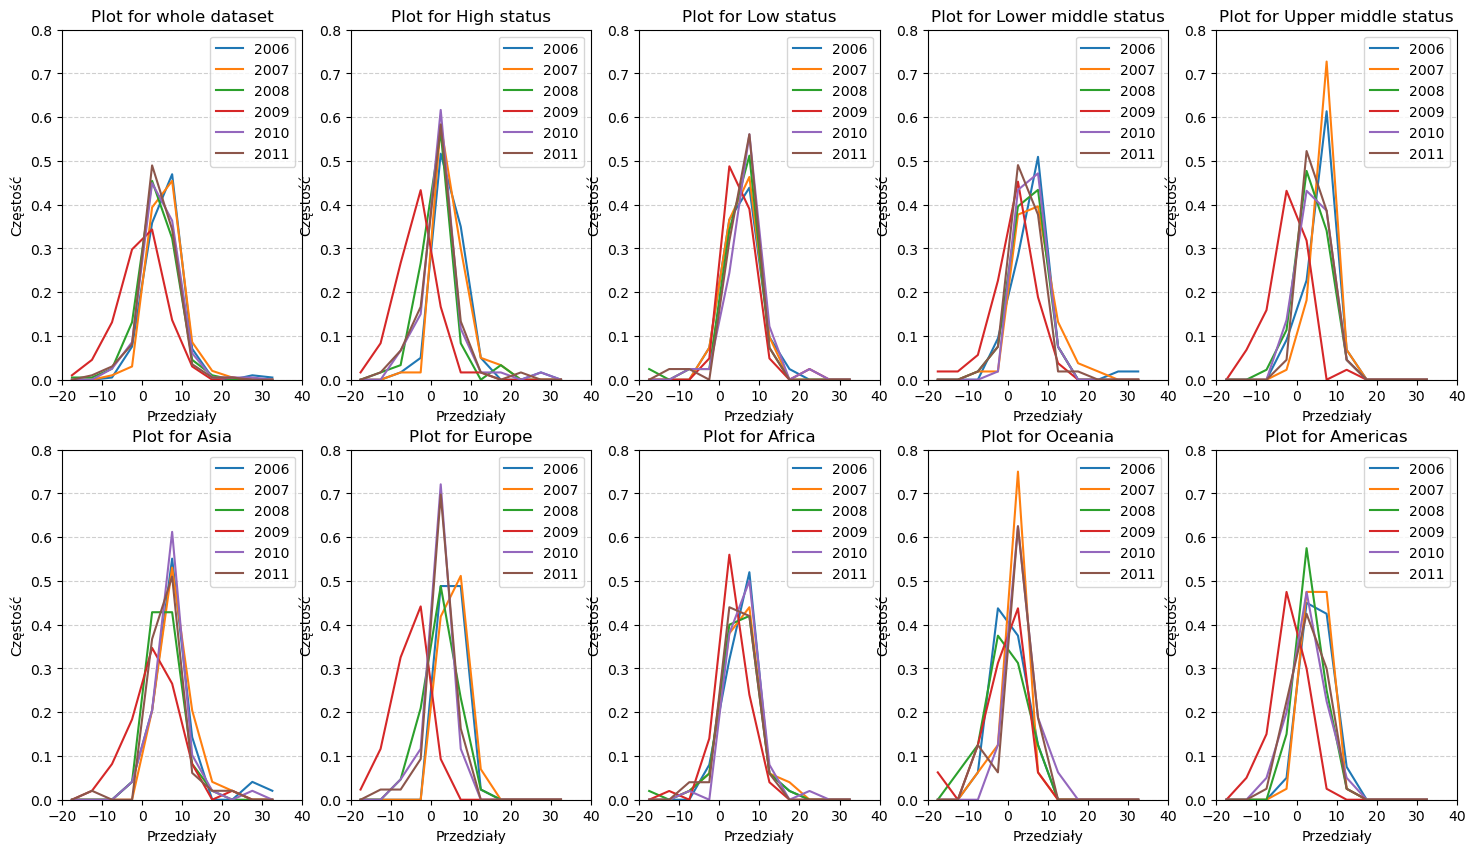

In [ ]:
# YOUR CODE HERE
fig,axes = plt.subplots(2,5, figsize=(18,10))
bins = np.arange(-20, 40, 5)
bin_centers = bins[:-1] + 2.5

years = ['2006', '2007', '2008', '2009', '2010', '2011']
statuses = ['High', 'Low', 'Lower middle', 'Upper middle']
regions = ['Asia', 'Europe', 'Africa', 'Oceania', 'Americas']

for year in range(2006, 2012):
        values = recession_data_1[str(year)].dropna()
        counts, _ = np.histogram(values, bins=bins)
        freq = counts / counts.sum()
        sns.lineplot(data=pd.DataFrame({'x': bin_centers, 'y': freq}), x='x', y='y', label=year, ax=axes[0, 0])
        axes[0, 0].set_title(f"Plot for whole dataset")
        axes[0, 0].set_ylim(0, 0.8)
        axes[0, 0].set_xlabel("Przedziały")
        axes[0, 0].set_ylabel("Częstość")
        axes[0, 0].set_xticks(np.arange(-20, 41, 10))
        axes[0, 0].grid(True, axis='y', linestyle='--', alpha=0.6)

for i, status in enumerate(statuses):
        for year in range(2006, 2012):
                df_status = recession_data_1[recession_data_1['Income Group'] == status]
                values = df_status[str(year)].dropna()
                counts, _ = np.histogram(values, bins=bins)
                freq = counts / counts.sum()
                sns.lineplot(data=pd.DataFrame({'x': bin_centers, 'y': freq}), x='x', y='y', label=year, ax=axes[0, i+1])
        axes[0, i+1].set_title(f"Plot for {status} status")
        axes[0, i+1].set_ylim(0, 0.8)
        axes[0, i+1].set_xlabel("Przedziały")
        axes[0, i+1].set_ylabel("Częstość")
        axes[0, i+1].set_xticks(np.arange(-20, 41, 10))
        axes[0, i+1].grid(True, axis='y', linestyle='--', alpha=0.6)

for i, region in enumerate(regions):
        for year in range(2006, 2012):
                df_region = recession_data_1[recession_data_1['Region Name'] == region]
                values = df_region[str(year)].dropna()
                counts, _ = np.histogram(values, bins=bins)
                freq = counts / counts.sum()
                sns.lineplot(data=pd.DataFrame({'x': bin_centers, 'y': freq}), x='x', y='y', label=year, ax = axes[1, i])
        axes[1, i].set_title(f"Plot for {region}")
        axes[1, i].set_ylim(0, 0.8)
        axes[1, i].set_xlabel("Przedziały")
        axes[1, i].set_ylabel("Częstość")
        axes[1, i].set_xticks(np.arange(-20, 41, 10))
        axes[1, i].grid(True, axis='y', linestyle='--', alpha=0.6)



/var/folders/6v/vn2k148n6p559d0ql_7qrfc40000gn/T/ipykernel_26195/1406481461.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['2006', '2007', '2008', '2009', '2010', '2011'])
/var/folders/6v/vn2k148n6p559d0ql_7qrfc40000gn/T/ipykernel_26195/1406481461.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['2006', '2007', '2008', '2009', '2010', '2011'])


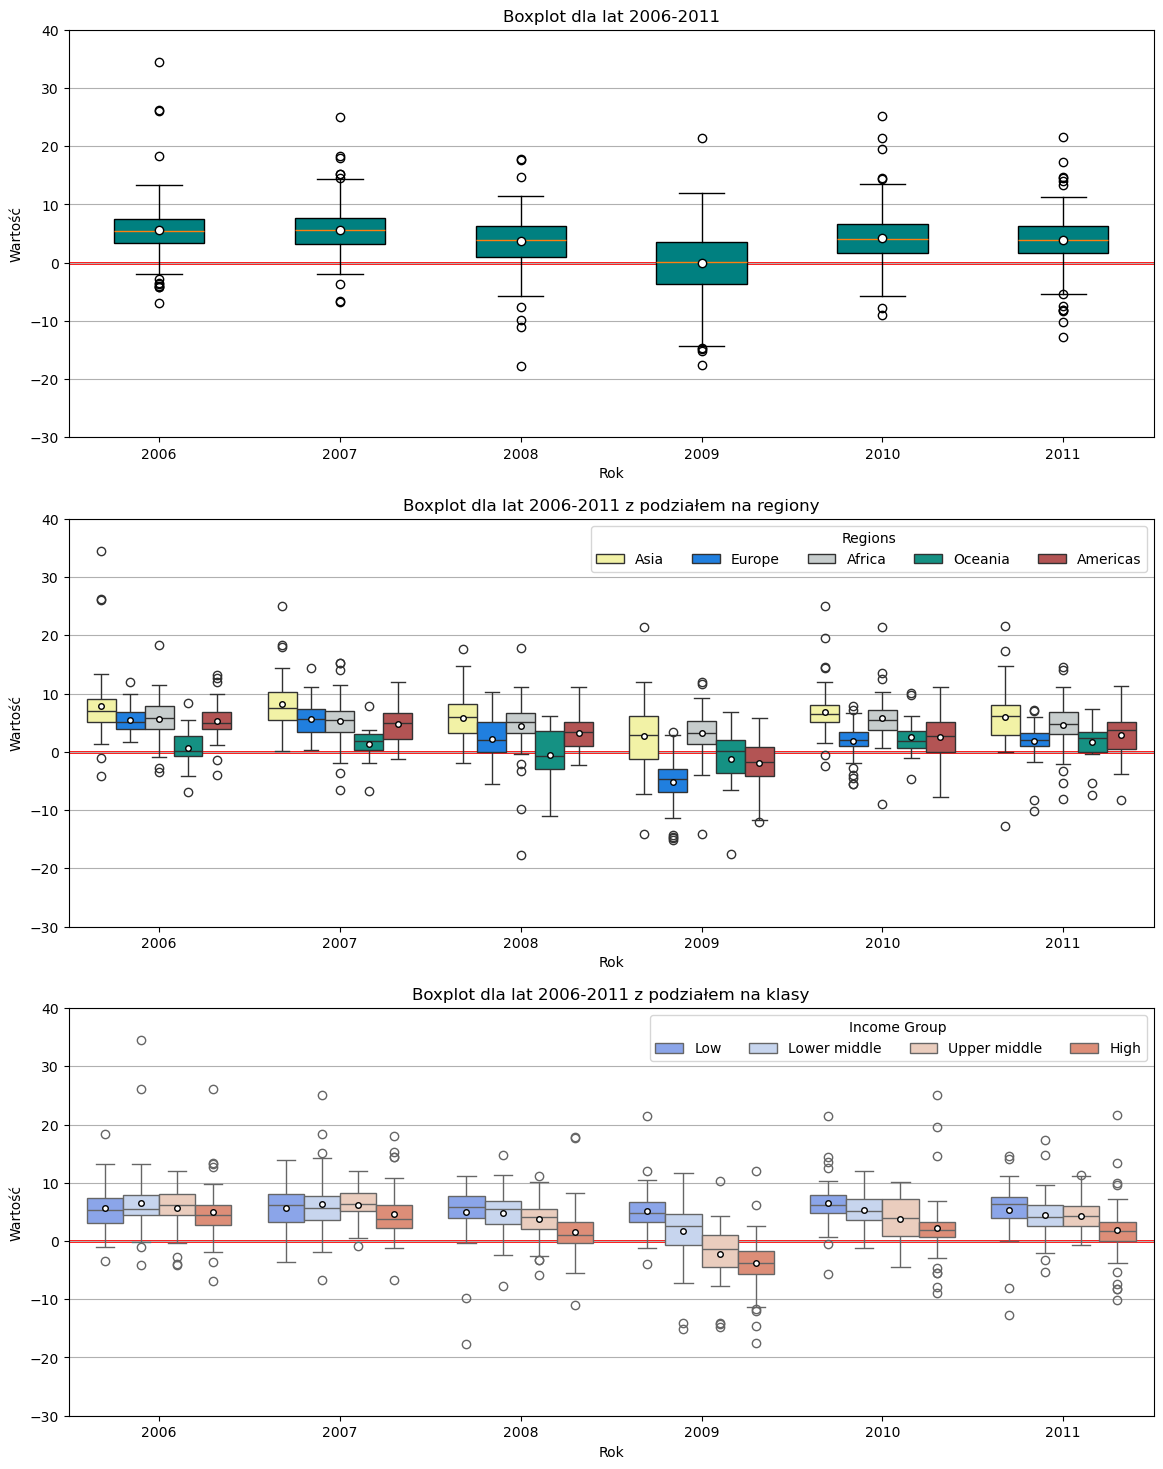

In [ ]:
# Boxplot
# YOUR CODE HERE
fig, axes = plt.subplots(3, 1, figsize=(14,18))

axes[0].boxplot(x = recession_data_1[['2006', '2007', '2008', '2009', '2010', '2011']], patch_artist = True, boxprops = {'facecolor': 'teal'}, showmeans = True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black',
                       'markersize':'6'})
axes[0].set_title("Boxplot dla lat 2006-2011")

kolory = ["#FFFF99", "#007FFF", "#C6CECE", "#00A693", "#C34444"]
region_data = pd.melt(recession_data_1, id_vars=["Region Name"], value_vars=['2006', '2007', '2008', '2009', '2010', '2011'], var_name="Year", value_name="Value")
sns.boxplot(data = region_data, x = "Year", y = "Value", hue = "Region Name", ax=axes[1], palette=kolory, showmeans = True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black',
                       'markersize':'4'})
axes[1].set_title("Boxplot dla lat 2006-2011 z podziałem na regiony")
axes[1].legend(loc='upper right', title="Regions", ncols = 6)


status_data = pd.melt(recession_data_1, id_vars=["Income Group"], value_vars=['2006', '2007', '2008', '2009', '2010', '2011'], var_name="Year", value_name="Value")
sns.boxplot(data = status_data, x = "Year", y = "Value", hue = "Income Group", ax=axes[2], palette='coolwarm', showmeans = True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black',
                       'markersize':'4'})
axes[2].set_title("Boxplot dla lat 2006-2011 z podziałem na klasy")
axes[2].legend(loc='upper right', title="Income Group", ncols= 6)


for ax in axes:
    ax.set_xticklabels(['2006', '2007', '2008', '2009', '2010', '2011'])
    ax.set_xlabel('Rok')
    ax.set_ylabel('Wartość')
    ax.set_ylim(-30, 40)
    ax.grid(True, axis = 'y')
    ax.axhline(0, color='red', linewidth=2, zorder = 0)


/var/folders/6v/vn2k148n6p559d0ql_7qrfc40000gn/T/ipykernel_26195/2429859868.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['2006', '2007', '2008', '2009', '2010', '2011'])
/var/folders/6v/vn2k148n6p559d0ql_7qrfc40000gn/T/ipykernel_26195/2429859868.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['2006', '2007', '2008', '2009', '2010', '2011'])
/var/folders/6v/vn2k148n6p559d0ql_7qrfc40000gn/T/ipykernel_26195/2429859868.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['2006', '2007', '2008', '2009', '2010', '2011'])


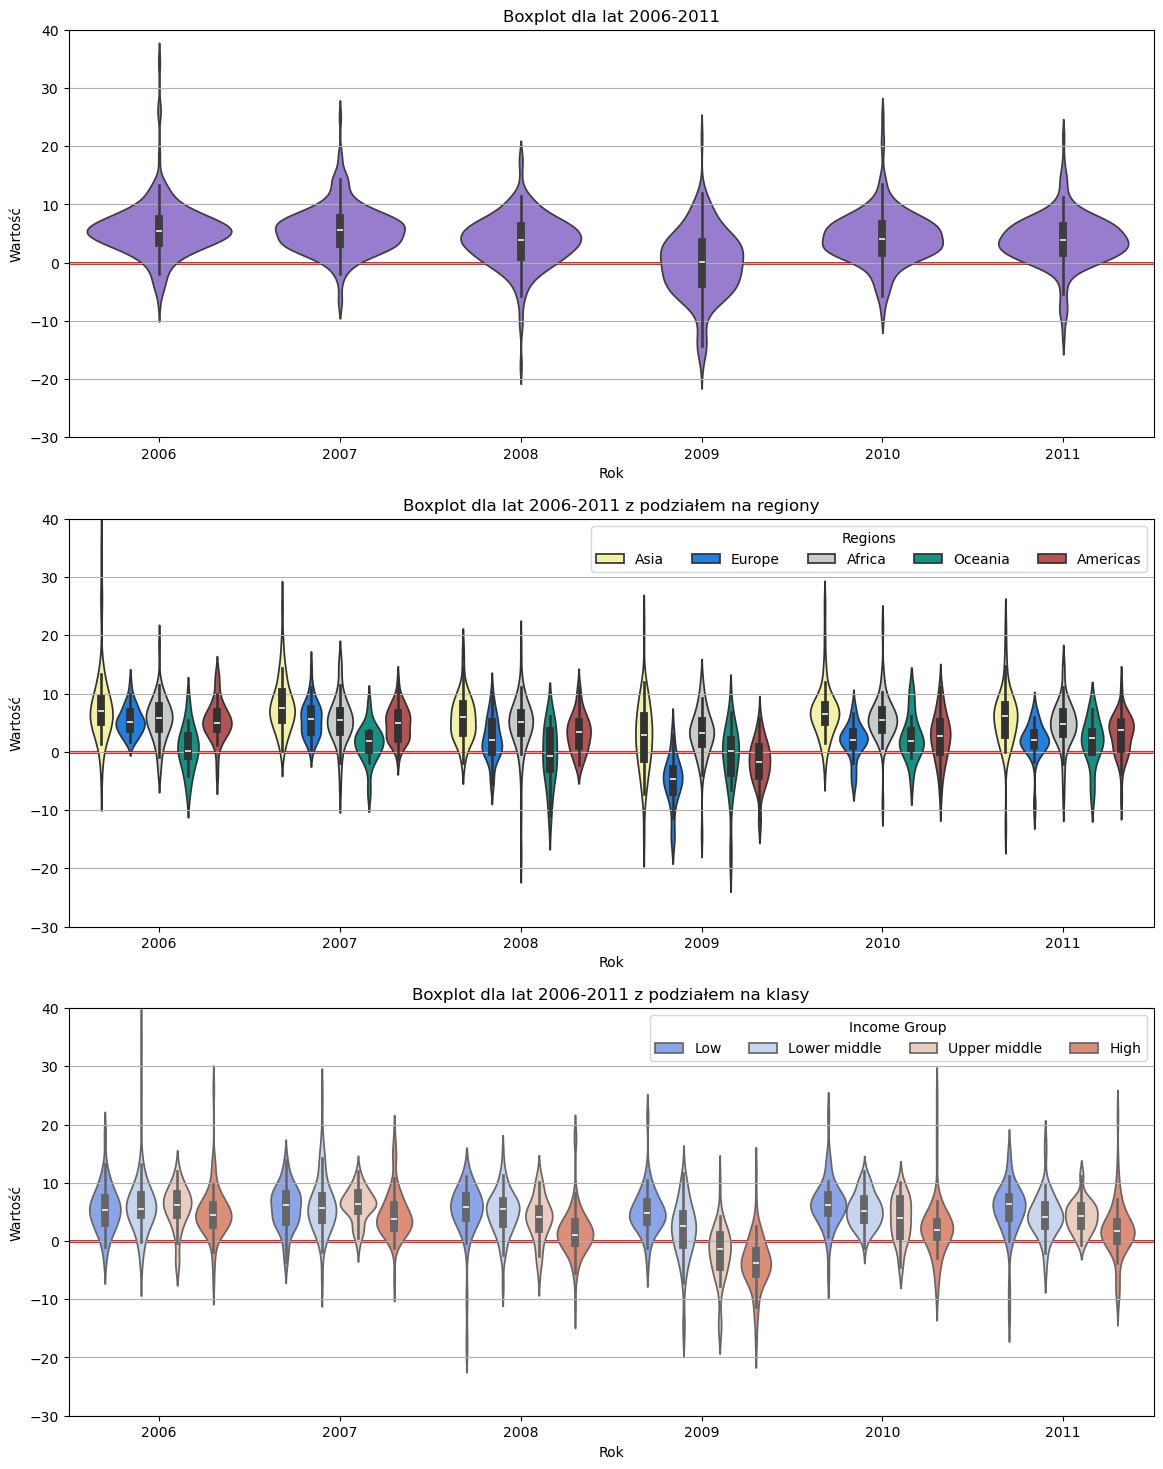

In [ ]:
# Violinplot
# YOUR CODE HERE
fig, axes = plt.subplots(3, 1, figsize=(14,18))

sns.violinplot(recession_data_1[['2006', '2007', '2008', '2009', '2010', '2011']], ax=axes[0], color="mediumpurple")
axes[0].set_title("Boxplot dla lat 2006-2011")

kolory = ["#FFFF99", "#007FFF", "#C6CECE", "#00A693", "#C34444"]
region_data = pd.melt(recession_data_1, id_vars=["Region Name"], value_vars=['2006', '2007', '2008', '2009', '2010', '2011'], var_name="Year", value_name="Value")
sns.violinplot(data = region_data, x = "Year", y = "Value", hue = "Region Name", ax=axes[1], palette=kolory)
axes[1].set_title("Boxplot dla lat 2006-2011 z podziałem na regiony")
axes[1].legend(loc='upper right', title="Regions", ncols = 6)


status_data = pd.melt(recession_data_1, id_vars=["Income Group"], value_vars=['2006', '2007', '2008', '2009', '2010', '2011'], var_name="Year", value_name="Value")
sns.violinplot(data = status_data, x = "Year", y = "Value", hue = "Income Group", ax=axes[2], palette='coolwarm')
axes[2].set_title("Boxplot dla lat 2006-2011 z podziałem na klasy")
axes[2].legend(loc='upper right', title="Income Group", ncols= 6)


for ax in axes:
    ax.set_xticklabels(['2006', '2007', '2008', '2009', '2010', '2011'])
    ax.set_xlabel('Rok')
    ax.set_ylabel('Wartość')
    ax.set_ylim(-30, 40)
    ax.grid(True, axis = 'y')
    ax.axhline(0, color='red', linewidth=2, zorder = 0)

/var/folders/6v/vn2k148n6p559d0ql_7qrfc40000gn/T/ipykernel_26195/254295713.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['2006', '2007', '2008', '2009', '2010', '2011'])
/var/folders/6v/vn2k148n6p559d0ql_7qrfc40000gn/T/ipykernel_26195/254295713.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['2006', '2007', '2008', '2009', '2010', '2011'])
/var/folders/6v/vn2k148n6p559d0ql_7qrfc40000gn/T/ipykernel_26195/254295713.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['2006', '2007', '2008', '2009', '2010', '2011'])


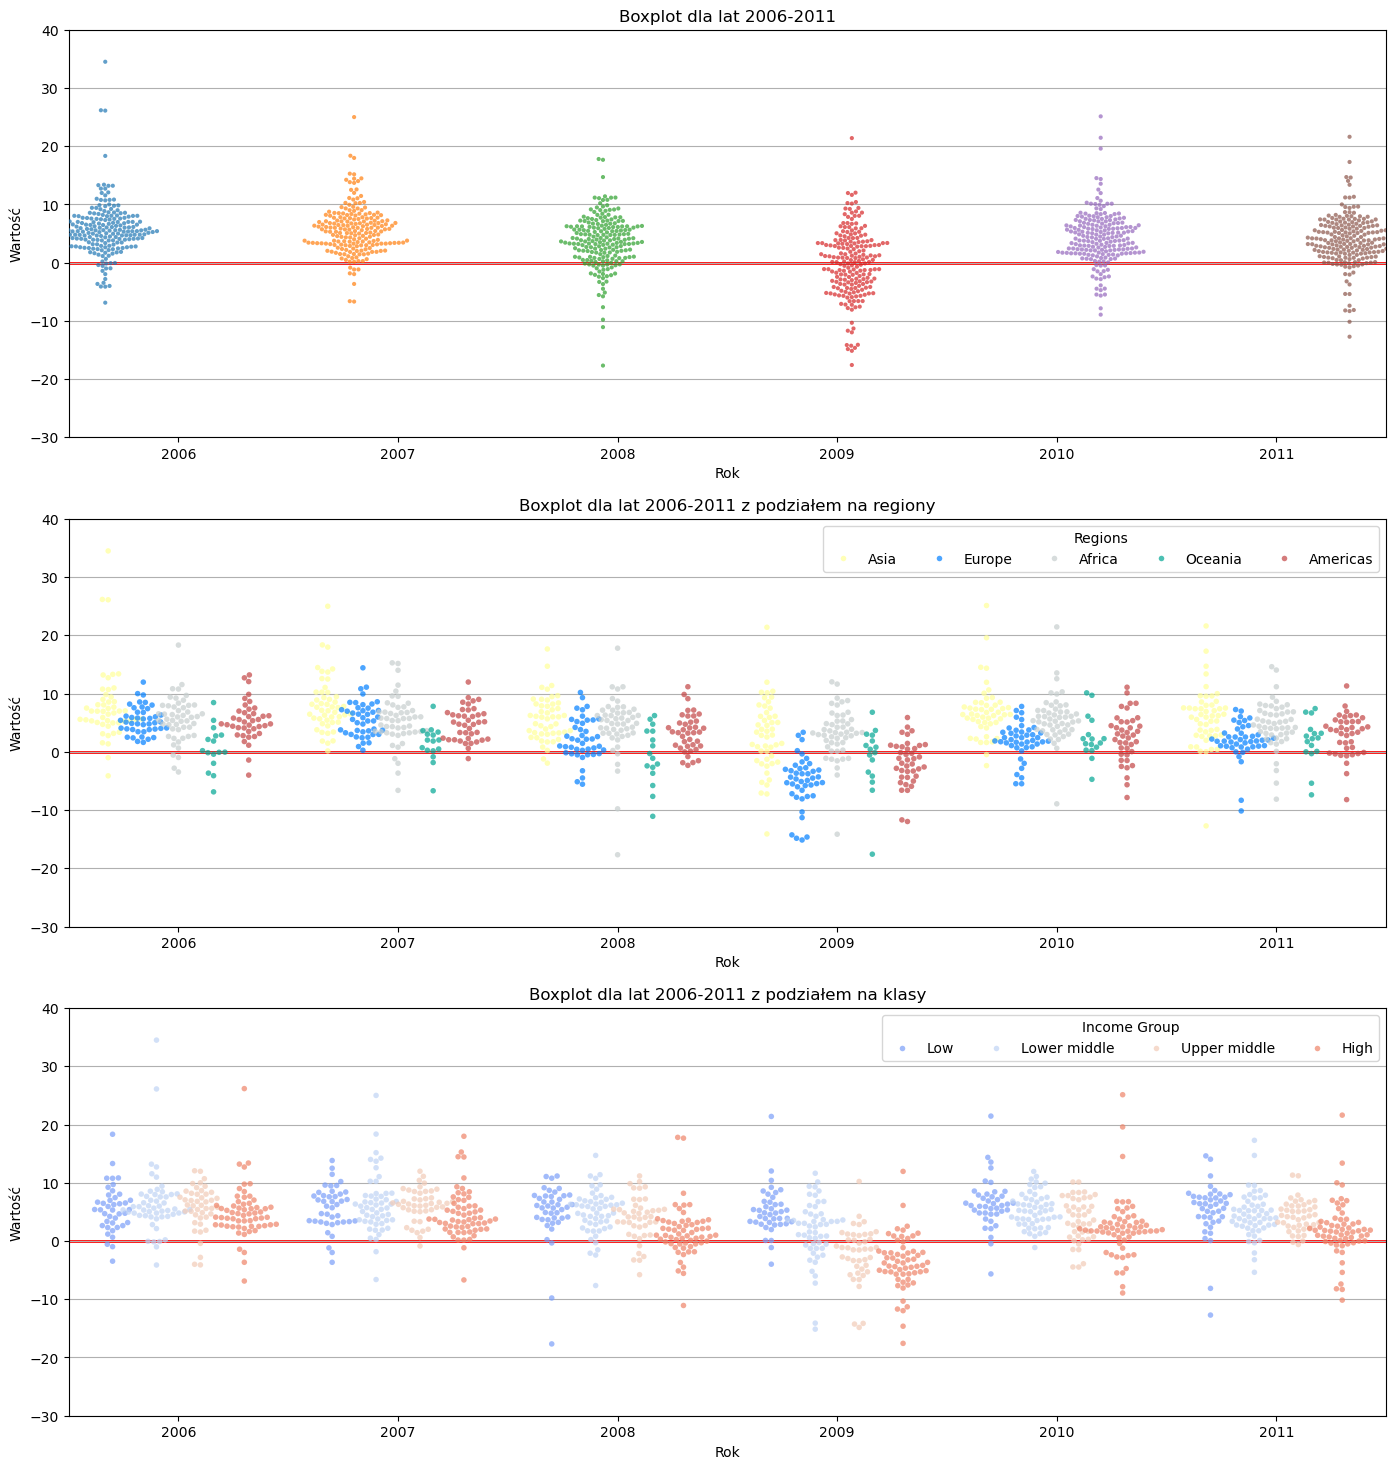

In [ ]:
# Swarmplot
# YOUR CODE HERE
fig, axes = plt.subplots(3, 1, figsize=(17,18))

sns.swarmplot(recession_data_1[['2006', '2007', '2008', '2009', '2010', '2011']], ax=axes[0], dodge=True, size=3, alpha=0.7)
axes[0].set_title("Boxplot dla lat 2006-2011")

kolory = ["#FFFF99", "#007FFF", "#C6CECE", "#00A693", "#C34444"]
region_data = pd.melt(recession_data_1, id_vars=["Region Name"], value_vars=['2006', '2007', '2008', '2009', '2010', '2011'], var_name="Year", value_name="Value")
sns.swarmplot(data = region_data, x = "Year", y = "Value", hue = "Region Name", ax=axes[1], palette=kolory, dodge=True, size=4, alpha=0.7)
axes[1].set_title("Boxplot dla lat 2006-2011 z podziałem na regiony")
axes[1].legend(loc='upper right', title="Regions", ncols = 6)


status_data = pd.melt(recession_data_1, id_vars=["Income Group"], value_vars=['2006', '2007', '2008', '2009', '2010', '2011'], var_name="Year", value_name="Value")
sns.swarmplot(data = status_data, x = "Year", y = "Value", hue = "Income Group", ax=axes[2], palette='coolwarm', dodge=True, size=4, alpha=0.7)
axes[2].set_title("Boxplot dla lat 2006-2011 z podziałem na klasy")
axes[2].legend(loc='upper right', title="Income Group", ncols= 6)


for ax in axes:
    ax.set_xticklabels(['2006', '2007', '2008', '2009', '2010', '2011'])
    ax.set_xlabel('Rok')
    ax.set_ylabel('Wartość')
    ax.set_ylim(-30, 40)
    ax.grid(True, axis = 'y')
    ax.axhline(0, color='red', linewidth=2, zorder = 0)

/var/folders/6v/vn2k148n6p559d0ql_7qrfc40000gn/T/ipykernel_26195/2124782684.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['2006', '2007', '2008', '2009', '2010', '2011'])
/var/folders/6v/vn2k148n6p559d0ql_7qrfc40000gn/T/ipykernel_26195/2124782684.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['2006', '2007', '2008', '2009', '2010', '2011'])
/var/folders/6v/vn2k148n6p559d0ql_7qrfc40000gn/T/ipykernel_26195/2124782684.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['2006', '2007', '2008', '2009', '2010', '2011'])


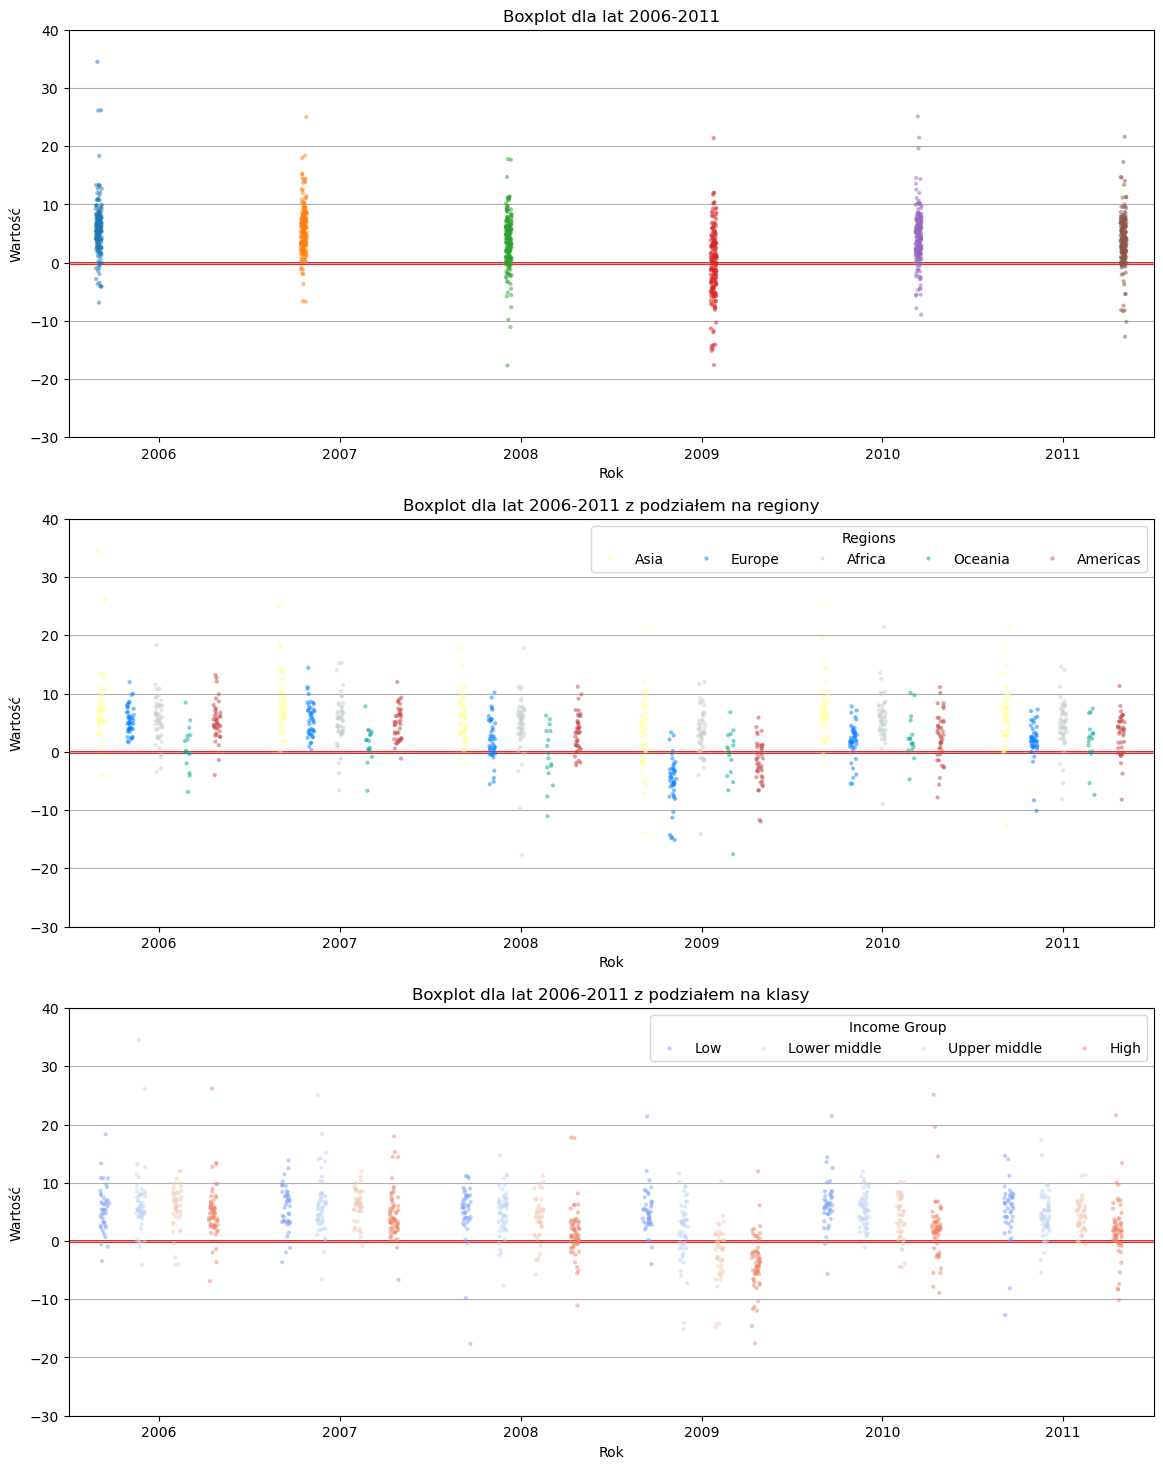

In [ ]:
# Stripplot
fig, axes = plt.subplots(3, 1, figsize=(14,18))

sns.stripplot(recession_data_1[['2006', '2007', '2008', '2009', '2010', '2011']], ax=axes[0], dodge=True, size=3, alpha=0.5, jitter=True)
axes[0].set_title("Boxplot dla lat 2006-2011")

kolory = ["#FFFF99", "#007FFF", "#C6CECE", "#00A693", "#C34444"]
region_data = pd.melt(recession_data_1, id_vars=["Region Name"], value_vars=['2006', '2007', '2008', '2009', '2010', '2011'], var_name="Year", value_name="Value")
sns.stripplot(data = region_data, x = "Year", y = "Value", hue = "Region Name", ax=axes[1], palette=kolory, dodge=True, size=3, alpha=0.5, jitter=True)
axes[1].set_title("Boxplot dla lat 2006-2011 z podziałem na regiony")
axes[1].legend(loc='upper right', title="Regions", ncols = 6)


status_data = pd.melt(recession_data_1, id_vars=["Income Group"], value_vars=['2006', '2007', '2008', '2009', '2010', '2011'], var_name="Year", value_name="Value")
sns.stripplot(data = status_data, x = "Year", y = "Value", hue = "Income Group", ax=axes[2], palette='coolwarm', dodge=True, size=3, alpha=0.5, jitter=True)
axes[2].set_title("Boxplot dla lat 2006-2011 z podziałem na klasy")
axes[2].legend(loc='upper right', title="Income Group", ncols= 6)


for ax in axes:
    ax.set_xticklabels(['2006', '2007', '2008', '2009', '2010', '2011'])
    ax.set_xlabel('Rok')
    ax.set_ylabel('Wartość')
    ax.set_ylim(-30, 40)
    ax.grid(True, axis = 'y')
    ax.axhline(0, color='red', linewidth=2, zorder = 0)

### Obliczanie wartości wybranych opisowych charakterystyk rozkładu w oparciu o szereg szczegółowy 

Korzystając z danych zawartych w tablicy `recession_data_1` oraz funkcji pakietu pandas oblicz dla każdego roku następujące opisowe charakterystyki rozkładu:
- wartość średnia (ang. mean),
- odchylenie standardowe (ang. standart deviation),
- wartość minimalna (ang. minimum),
- kwartyle (ang. quartiles),
- wartość maksymalna (ang. maximum),
- eksces/kurtoza (ang. excess kurtosis),
- skośność (ang. skew).

Zestaw wyniki w tablicy `descriptive_parameters_1`.

Indeks:
 - zawiera następujące nazwy wierszy: mean, std, min, Q1, Q2, Q3, max, kurt, skew.
 
Kolumny:
 - lata (osobna kolumna dla każdego roku opatrzona nagłówkiem 2006, 2007 itd. sformatowanym jako str)

In [ ]:
# YOUR CODE HERE
years = ['2006', '2007', '2008', '2009', '2010', '2011']
mean = recession_data_1[years].mean()
std = recession_data_1[years].std()
mini = recession_data_1[years].min()
Q1 = recession_data_1[years].quantile(0.25)
Q2 = recession_data_1[years].quantile(0.5)
Q3 = recession_data_1[years].quantile(0.75)
maxi = recession_data_1[years].max()
kurt = recession_data_1[years].kurt()
skew = recession_data_1[years].skew()

descriptive_parameters_1 = pd.DataFrame({
    'mean': mean,
    'std': std,
    'min': mini,
    'Q1': Q1,
    'Q2': Q2,
    'Q3': Q3,
    'max': maxi,
    'kurt': kurt,
    'skew': skew
}).T 

descriptive_parameters_1

,2006,2007,2008,2009,2010,2011
mean,5.678241,5.676541,3.658874,-0.099351,4.285734,3.812680
std,4.659570,4.128360,4.494198,5.812413,4.503445,4.354840
min,-6.871463,-6.684028,-17.668946,-17.573222,-8.924176,-12.714897
Q1,3.455779,3.204031,1.004863,-3.739051,1.719445,1.636183
Q2,5.404226,5.622465,3.807492,0.129142,4.132582,3.821286
Q3,7.560790,7.700604,6.240954,3.499009,6.705470,6.316869
max,34.500000,25.000000,17.799109,21.390528,25.122760,21.616529
kurt,10.163041,2.877701,3.166838,0.931665,3.435235,3.107475
skew,1.870104,0.723625,-0.597186,-0.150527,0.649393,-0.107946


#### a) Obliczanie wartości wybranych opisowych charakterystyk rozkładu

Korzystając z danych zawartych w tablicy `recession_table_1` oblicz dla każdego roku następujące opisowe charakterystyki rozkładu:
- wartość średnia (ang. mean),
- odchylenie standardowe (ang. standart deviation),
- kwartyle (ang. quartiles),
- moda (ang. mode).

Zestaw wyniki w tablicy `descriptive_parameters_2`.

> Indeks: </br>
> Zawiera wiersze o następujących nazwach: mean, std, Q1, Q2, Q3, mode.

> Kolumny: lata (osobna kolumna dla każdego roku opatrzona nagłówkiem 2006, 2007 itd. sformatowanym jako str) </br>


In [ ]:
# YOUR CODE HERE
years = ['2006', '2007', '2008', '2009', '2010', '2011']

left = recession_table_1.columns.left.values
right = recession_table_1.columns.right.values
mids = (right + left) / 2

mean = {}
std = {}
q1, q2, q3 = {}, {}, {}
mode = {}

def quant(p, freq):
    cumf = freq.cumsum()
    idx = (cumf >= p).idxmax()
    i = list(recession_table_1.columns).index(idx)
    F = cumf.iloc[i-1] if i > 0 else 0
    return left[i] + ((p - F) / freq.iloc[i]) * 5


for year in years:
    freq = recession_table_1.loc[year, :]
    mean[year] = (mids * freq).sum()
    std[year] = np.sqrt(( (mids - mean[year])**2 * freq).sum())

    q1[year] = quant(0.25, freq)
    q2[year] = quant(0.5, freq)
    q3[year] = quant(0.75, freq)

    i = list(recession_table_1.columns).index(freq.idxmax())
    nD_minus1 = freq.iloc[i-1] if i > 0 else 0
    nD_plus1 = freq.iloc[i+1] if i < len(freq) - 1 else 0
    mode[year] = left[i] + ((freq.iloc[i] - nD_minus1) / ((freq.iloc[i] - nD_minus1) + (freq.iloc[i] - nD_plus1))) * 5


descriptive_parameters_2 = pd.DataFrame([mean, std, q1, q2, q3, mode], index=['mean', 'std', 'Q1', 'Q2', 'Q3', 'mode'])
descriptive_parameters_2

,2006,2007,2008,2009,2010,2011
mean,5.606061,5.782828,3.636364,-0.101010,4.545455,3.863636
std,4.853809,4.184001,4.751033,6.045066,4.685347,4.568125
Q1,2.359155,2.660256,0.916667,-3.940678,1.544944,1.276042
Q2,5.645161,5.722222,3.666667,0.220588,4.325843,3.854167
Q3,8.306452,8.472222,6.992188,3.860294,7.604167,7.022059
mode,6.089109,5.705882,3.555556,0.900000,4.044944,3.691589


/var/folders/6v/vn2k148n6p559d0ql_7qrfc40000gn/T/ipykernel_49345/3798432121.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Rok",


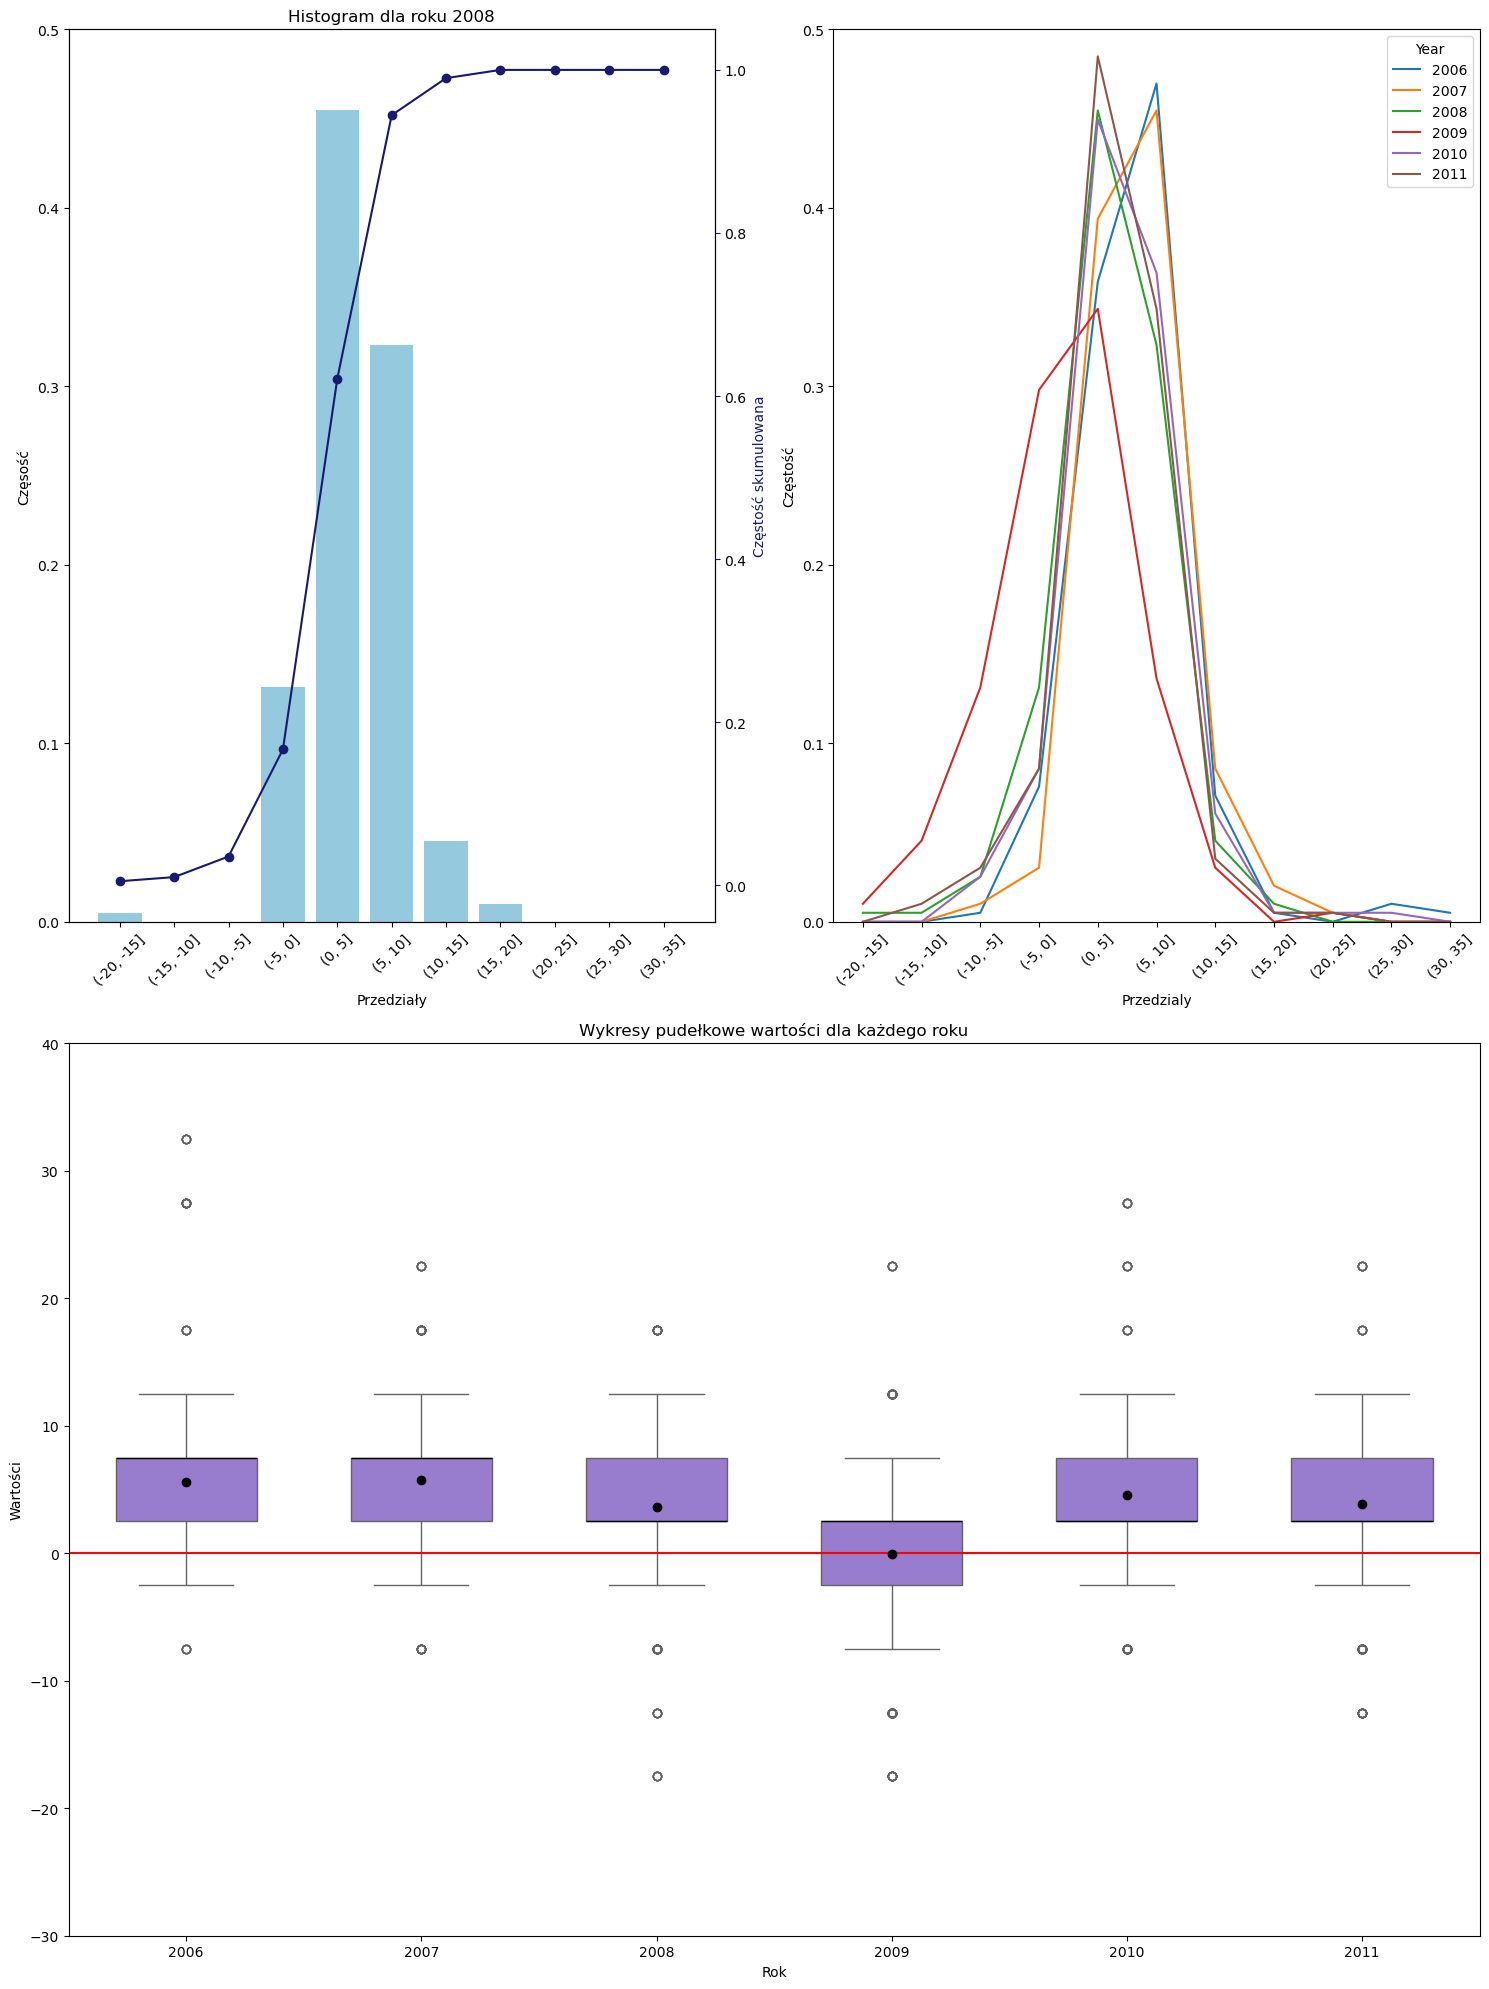

In [ ]:
# YOUR CODE HERE
fig = plt.figure(figsize=(15, 20))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])


sns.barplot(x=recession_table_1.loc['2008', :].index, y=recession_table_1.loc['2008', :].values, color='skyblue', ax=ax1)

ax12 = ax1.twinx()
cumulative_values = np.cumsum(recession_table_1.loc['2008', :].values)
ax12.plot(cumulative_values, color='midnightblue', marker='o')

ax1.set_ylabel('Częsość')
ax1.tick_params(axis = 'x', rotation=45)
ax1.set_xlabel('Przedziały')
ax1.set_title('Histogram dla roku 2008')
ax12.set_ylabel('Częstość skumulowana', color='midnightblue')
ax12.tick_params(axis = 'y', color='midnightblue')
ax1.set_ylim(0, 0.5)



for year in recession_data_1[years]:
    rel_freq = recession_table_1.loc[year] / recession_table_1.loc[year].sum()
    ax2.plot(recession_table_1.columns.astype(str), rel_freq, label=str(year))

ax2.legend(title = 'Year')
ax2.tick_params(axis = 'x', rotation = 45)
ax2.set_xlabel('Przedzialy')
ax2.set_ylabel('Częstość')
ax2.set_ylim(0, 0.5)




expanded = []
for year in years:
    freqs = recession_table_1.loc[year].values
    for i, count in enumerate(freqs):
        expanded += [{'Rok': year, 'Wartość': mids[i]}] * int(count * 1000)
expanded_df = pd.DataFrame(expanded)

sns.boxplot(x="Rok",
    y="Wartość",
    data=expanded_df,
    widths=0.6,
    ax=ax3,
    palette=["mediumpurple"]*len(years),  # <--- kolor w Seaborn przez palette
    showmeans=True,
    meanprops=dict(marker='o', markerfacecolor='black', markeredgecolor='black'),
    medianprops=dict(color='black'))

ax3.set_ylabel('Wartości')
ax3.axhline(0, color='red', linestyle='-')
ax3.set_ylim(-30, 40)
ax3.set_title("Wykresy pudełkowe wartości dla każdego roku")


plt.tight_layout()